In [4]:
import pandas as pd
import geopandas as gpd
from fiona.crs import from_string
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


# 경고 무시 모듈
import warnings

# 경고를 무시
warnings.filterwarnings(action='ignore')

# 경고 보이기  
#warnings.filterwarnings(action='default')

In [5]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [7]:
thema_path = 'D:/김해시청 프로젝트/김해시_유동인구_구역/'
thema_list = os.listdir(thema_path + '구역_반경/')
thema_list

['경전철', '공원', '대형복합쇼핑몰', '역사 관광지', '특성화거리']

In [8]:
thema_path = 'D:/김해시청 프로젝트/김해시_유동인구_구역/'
thema_list = os.listdir(thema_path + '구역_반경/')

cnct_df = None

for tm in tqdm(thema_list):
    
    directory = f'{thema_path}월별_반경_데이터_병합_shp/2022년/성연령별/{tm}/'
    df = gpd.GeoDataFrame.from_file(f'{directory}{tm}.shp', encoding='cp949')
    
    if tm == '경전철':
        cnct_df = df
        continue
    cnct_df = pd.concat([cnct_df, df])

  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
cnct_df.reset_index(drop=True, inplace=True)

In [12]:
cnct_df.columns

Index(['MEAN_X', 'MEAN_Y', 'ringId', 'distance', 'm_0009', 'm_1019', 'm_2029',
       'm_3039', 'm_4049', 'm_5059', 'm_6069', 'm_7000', 'm_sum', 'w_0009',
       'w_1019', 'w_2029', 'w_3039', 'w_4049', 'w_5059', 'w_6069', 'w_7000',
       'w_sum', 't_sum', 'layer', 'geometry'],
      dtype='object')

In [14]:
cnct_df_drop = cnct_df.drop(['MEAN_X', 'MEAN_Y', 'ringId', 'distance', 't_sum', 'w_sum', 'm_sum', 'geometry'], axis=1)

In [15]:
cnct_df_drop

m_0009  m_1019  m_2029  m_3039  m_4049  m_5059  m_6069  m_7000  w_0009  \
0     1569    2487    2393    2169    3022    2639    1420     589    1478   
1     1040    1588    1854    1818    2372    2293    1396     645    1010   
2     1839    3119    3469    3012    3941    3663    2123     986    1768   
3     3053    5289    5664    4660    6494    5826    3034    1169    2852   
4      257     370     515     553     551     601     495     332     277   
5     1129    1934    2031    1698    2368    2115    1106     431    1058   
6     2236    3849    4094    3389    4722    4230    2207     854    2088   
7     3297    5744    6143    5084    7059    6351    3334    1309    3098   
8     1978    3053    4320    4954    5724    5563    3947    2335    2132   
9      205     286     317     349     390     385     288     179     210   
10     907    1226     939    1056    1469    1215     699     329     864   
11    1220    1668    1268    1429    1989    1644     946     446    1163   
12     835    1142     882     993    1369    1140     666     320     798   
13     270     384     537     586     576     634     529     357     293   
14     434     593     451     508     707     585     336     158     414   
15    2829    3612    5001    5386    5537    6129    4671    2810    2784   
16    5152    8960    9576    7878   10985    9854    5128    1976    4817   
17     473     670     950    1036    1013    1119     938     636     514   

    w_1019  w_2029  w_3039  w_4049  w_5059  w_6069  w_7000     layer  
0     2231    2040    2266    3354    2624    1365     928      박물관역  
1     1438    1591    1709    2435    2131    1323     996       봉황역  
2     2877    3044    3032    4459    3719    2157    1680     수로왕릉역  
3     4769    4753    4763    7381    5733    2854    2013      거북공원  
4      387     541     524     609     688     599     553     봉황대공원  
5     1742    1711    1742    2681    2084    1045     733      연지공원  
6     3469    3441    3468    5359    4164    2079    1463  문화의전당 인근  
7     5186    5180    5194    8019    6264    3162    2258    신세계백화점  
8     2814    4932    5465    7853    6434    4880    3351     아이스퀘어  
9      280     319     346     422     426     334     288   김해민속박물관  
10    1089     833    1149    1553    1233     699     443     김해박물관  
11    1483    1123    1556    2104    1670     946     601    김해시민의종  
12    1018     787    1076    1449    1164     672     438  대성동고분박물관  
13     402     570     553     636     729     643     593      수로왕릉  
14     527     400     553     748     594     336     213     수로왕비릉  
15    4596    4803    4922    5989    6511    5338    4599  글로벌 푸드타운  
16    8069    8032    8048   12485    9700    4826    3405      먹자골목  
17     707    1012     976    1118    1289    1142    1057      봉리단길

In [16]:
cnct_df_drop.rename(columns={'m_0009' : '10대 미만 남자', 
                        'm_1019' : '10대 남자', 
                        'm_2029' : '20대 남자', 
                        'm_3039' : '30대 남자', 
                        'm_4049' : '40대 남자', 
                        'm_5059' : '50대 남자', 
                        'm_6069' : '60대 남자', 
                        'm_7000' : '70대 이상 남자', 
                        'w_0009' : '10대 미만 여자', 
                        'w_1019' : '10대 여자', 
                        'w_2029' : '20대 여자', 
                        'w_3039' : '30대 여자', 
                        'w_4049' : '40대 여자', 
                        'w_5059' : '50대 여자', 
                        'w_6069' : '60대 여자', 
                        'w_7000' : '70대 이상 여자'}, inplace=True)

In [17]:
cnct_df_drop

10대 미만 남자  10대 남자  20대 남자  30대 남자  40대 남자  50대 남자  60대 남자  70대 이상 남자  \
0        1569    2487    2393    2169    3022    2639    1420        589   
1        1040    1588    1854    1818    2372    2293    1396        645   
2        1839    3119    3469    3012    3941    3663    2123        986   
3        3053    5289    5664    4660    6494    5826    3034       1169   
4         257     370     515     553     551     601     495        332   
5        1129    1934    2031    1698    2368    2115    1106        431   
6        2236    3849    4094    3389    4722    4230    2207        854   
7        3297    5744    6143    5084    7059    6351    3334       1309   
8        1978    3053    4320    4954    5724    5563    3947       2335   
9         205     286     317     349     390     385     288        179   
10        907    1226     939    1056    1469    1215     699        329   
11       1220    1668    1268    1429    1989    1644     946        446   
12        835    1142     882     993    1369    1140     666        320   
13        270     384     537     586     576     634     529        357   
14        434     593     451     508     707     585     336        158   
15       2829    3612    5001    5386    5537    6129    4671       2810   
16       5152    8960    9576    7878   10985    9854    5128       1976   
17        473     670     950    1036    1013    1119     938        636   

    10대 미만 여자  10대 여자  20대 여자  30대 여자  40대 여자  50대 여자  60대 여자  70대 이상 여자  \
0        1478    2231    2040    2266    3354    2624    1365        928   
1        1010    1438    1591    1709    2435    2131    1323        996   
2        1768    2877    3044    3032    4459    3719    2157       1680   
3        2852    4769    4753    4763    7381    5733    2854       2013   
4         277     387     541     524     609     688     599        553   
5        1058    1742    1711    1742    2681    2084    1045        733   
6        2088    3469    3441    3468    5359    4164    2079       1463   
7        3098    5186    5180    5194    8019    6264    3162       2258   
8        2132    2814    4932    5465    7853    6434    4880       3351   
9         210     280     319     346     422     426     334        288   
10        864    1089     833    1149    1553    1233     699        443   
11       1163    1483    1123    1556    2104    1670     946        601   
12        798    1018     787    1076    1449    1164     672        438   
13        293     402     570     553     636     729     643        593   
14        414     527     400     553     748     594     336        213   
15       2784    4596    4803    4922    5989    6511    5338       4599   
16       4817    8069    8032    8048   12485    9700    4826       3405   
17        514     707    1012     976    1118    1289    1142       1057   

       layer  
0       박물관역  
1        봉황역  
2      수로왕릉역  
3       거북공원  
4      봉황대공원  
5       연지공원  
6   문화의전당 인근  
7     신세계백화점  
8      아이스퀘어  
9    김해민속박물관  
10     김해박물관  
11    김해시민의종  
12  대성동고분박물관  
13      수로왕릉  
14     수로왕비릉  
15  글로벌 푸드타운  
16      먹자골목  
17      봉리단길

In [105]:
df_0 = cnct_df_drop

In [108]:
df_0.set_index('layer', inplace=True)

In [109]:
#df_0.to_csv('./전처리/2022년_성연령별.csv', encoding='cp949')

In [22]:
cnct_df_drop.loc[0][8:16]*-1

10대 미만 여자    -1478
10대 여자       -2231
20대 여자       -2040
30대 여자       -2266
40대 여자       -3354
50대 여자       -2624
60대 여자       -1365
70대 이상 여자     -928
Name: 0, dtype: object

In [116]:
cnct_df_drop.reset_index(inplace=True)

In [51]:
cnct_df_drop.loc[0]['layer']

'박물관역'

In [76]:
a = 0
a+=1
a+=1
a

2

In [121]:
max(cnct_df_drop.loc[0][1:9])

3022

In [120]:
max(cnct_df_drop.loc[0][9:17])

3354

In [122]:
max(max(cnct_df_drop.loc[0][1:9]), max(cnct_df_drop.loc[0][9:17]))

3354

In [165]:
# 최대 사용자 연령대가 적은 순으로 정렬

user_1500_dict = dict()
user_5000_dict = dict()
user_10000_dict = dict()

for idx in range(18):
    if 1500 >=  max(max(cnct_df_drop.loc[idx][1:9]), max(cnct_df_drop.loc[idx][9:17])):
        user_1500_dict[idx] = max(max(cnct_df_drop.loc[idx][1:9]), max(cnct_df_drop.loc[idx][9:17]))
    elif 5000 >= max(max(cnct_df_drop.loc[idx][1:9]), max(cnct_df_drop.loc[idx][9:17])):
        user_5000_dict[idx] = max(max(cnct_df_drop.loc[idx][1:9]), max(cnct_df_drop.loc[idx][9:17]))
    else:
        user_10000_dict[idx] = max(max(cnct_df_drop.loc[idx][1:9]), max(cnct_df_drop.loc[idx][9:17]))
        
user_1500 = []
user_5000 = []
user_10000 = []

user_1500_dict_r = dict(zip(user_1500_dict.values(),user_1500_dict.keys()))
user_5000_dict_r = dict(zip(user_5000_dict.values(),user_5000_dict.keys()))
user_10000_dict_r = dict(zip(user_10000_dict.values(),user_10000_dict.keys()))

for x,y,z in zip(sorted(user_1500_dict.values()), sorted(user_5000_dict.values()), sorted(user_10000_dict.values())):
    user_1500.append(user_1500_dict_r[x])
    user_5000.append(user_5000_dict_r[y])
    user_10000.append(user_10000_dict_r[z])
    
    
user_sum = user_1500 + user_5000 +user_10000
user_sum

[9, 4, 13, 14, 17, 12, 10, 11, 1, 5, 0, 2, 6, 15, 3, 8, 7, 16]

In [167]:
cnct_df_drop['t_sum'] = cnct_df_drop.sum(axis=1)

In [169]:
cnct_df_drop.loc[0]['t_sum']

32574

In [229]:
user_2500_li

[1, 4, 9, 10, 11, 12, 13, 14, 17]

In [230]:
user_5000_li

[0, 2, 5]

In [231]:
user_10000_li

[3, 6, 7, 8, 15, 16]

In [233]:
user_2500_dict

{1: 25639, 4: 7852, 9: 5024}

In [228]:
# total 사용자 연령대가 적은 순으로 정렬

user_1500_li = []
user_5000_li = []
user_10000_li = []

for idx in range(18):
    if 1500 >=  max(max(cnct_df_drop.loc[idx][1:9]), max(cnct_df_drop.loc[idx][9:17])):
        user_1500_li.append(idx)
    elif 5000 >= max(max(cnct_df_drop.loc[idx][1:9]), max(cnct_df_drop.loc[idx][9:17])):
        user_5000_li.append(idx)
    else:
        user_10000_li.append(idx)

        
user_1500_dict = dict()      
user_5000_dict = dict()
user_10000_dict = dict()



for x,y,z in zip(user_1500_li, user_5000_li, user_10000_li):
    user_1500_dict[x] = cnct_df_drop.loc[x]['t_sum']
    user_5000_dict[y] = cnct_df_drop.loc[y]['t_sum']
    user_10000_dict[z] = cnct_df_drop.loc[z]['t_sum']

        
user_1500 = []
user_5000 = []
user_10000 = []



user_1500_dict_r = dict(zip(user_1500_dict.values(),user_1500_dict.keys()))
user_5000_dict_r = dict(zip(user_5000_dict.values(),user_5000_dict.keys()))
user_10000_dict_r = dict(zip(user_10000_dict.values(),user_10000_dict.keys()))

for x,y,z in zip(sorted(user_1500_dict.values()), sorted(user_5000_dict.values()), sorted(user_10000_dict.values())):
    user_1500.append(user_1500_dict_r[x])
    user_5000.append(user_5000_dict_r[y])
    user_10000.append(user_10000_dict_r[z])
    
    
user_sum = user_1500 + user_5000 +user_10000
user_sum

[9, 4, 1, 5, 0, 2, 6, 3, 7]

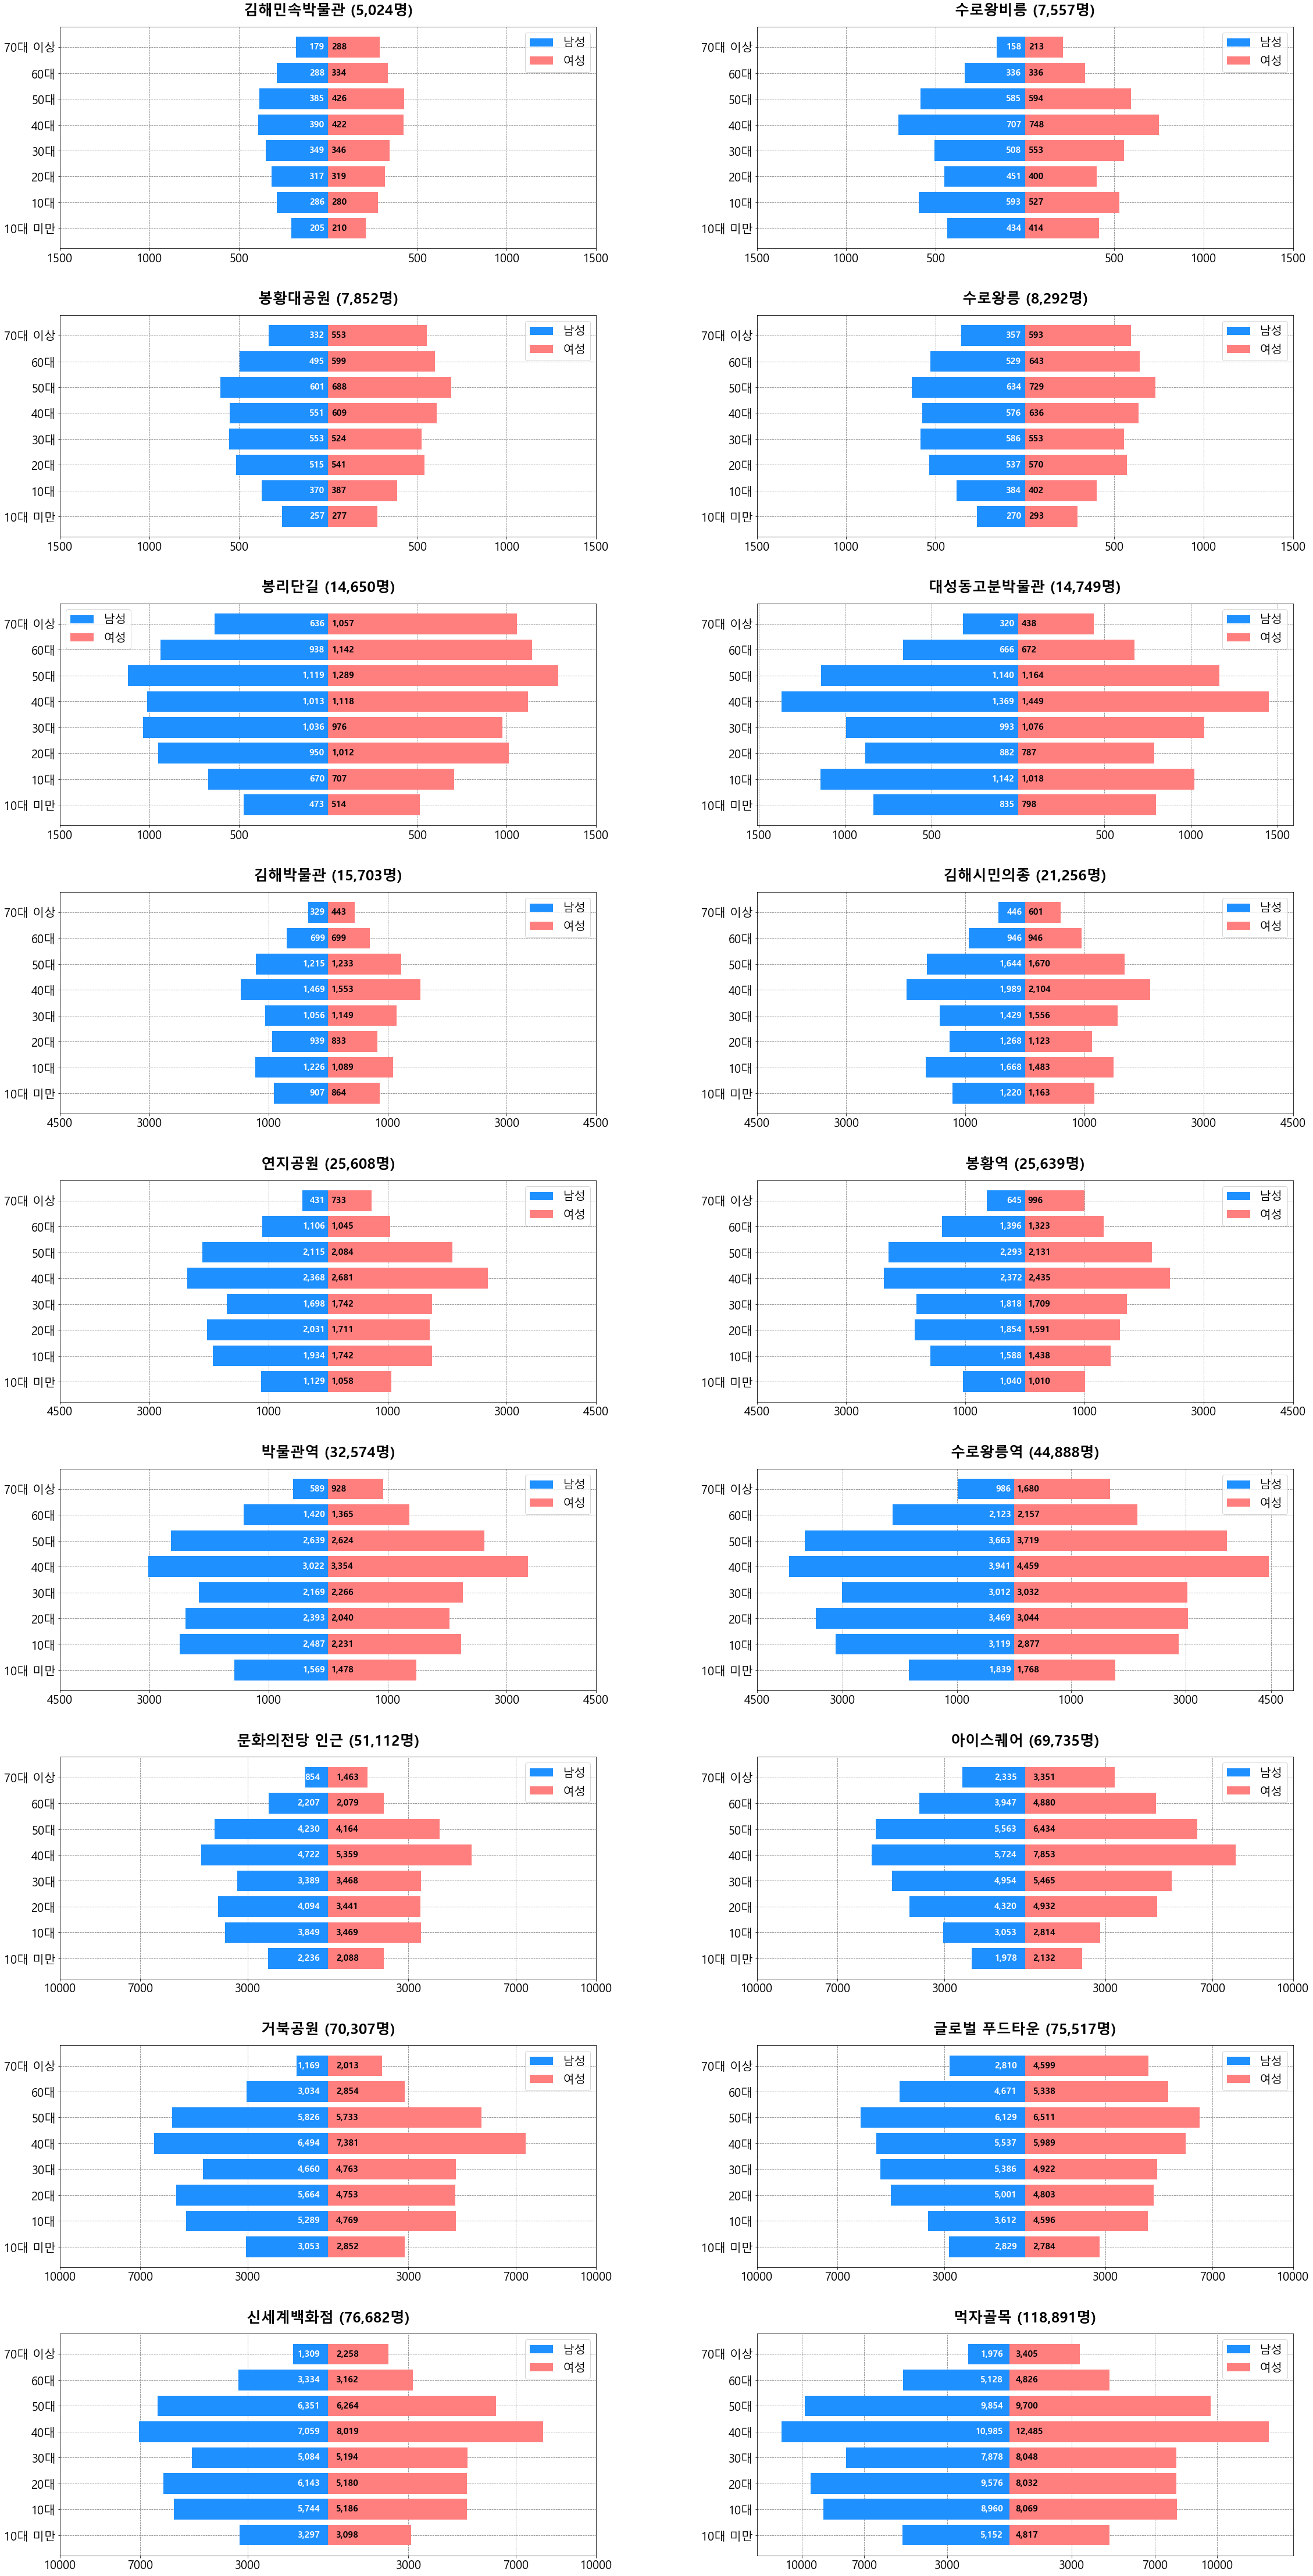

In [250]:
f, ax = plt.subplots(9, 2, facecolor='w')

# 격자 크기 설정
f.set_size_inches((38, 80))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

#f, ax = plt.subplots(figsize=(12, 7))
plt.rc('font', size=20)

###################################################################
user_1500_li = []
user_4500_li = []
user_10000_li = []

for idx in range(18):
    if 1500 >=  max(max(cnct_df_drop.loc[idx][1:9]), max(cnct_df_drop.loc[idx][9:17])):
        user_1500_li.append(idx)
    elif 5000 >= max(max(cnct_df_drop.loc[idx][1:9]), max(cnct_df_drop.loc[idx][9:17])):
        user_4500_li.append(idx)
    else:
        user_10000_li.append(idx)

user_1500_dict = dict()      
user_4500_dict = dict()
user_10000_dict = dict()

for x,y,z in zip(user_1500_li, user_4500_li, user_10000_li):
    user_1500_dict[x] = cnct_df_drop.loc[x]['t_sum']
    user_4500_dict[y] = cnct_df_drop.loc[y]['t_sum']
    user_10000_dict[z] = cnct_df_drop.loc[z]['t_sum']

user_1500 = []
user_4500 = []
user_10000 = []

user_1500_dict_r = dict(zip(user_1500_dict.values(),user_1500_dict.keys()))
user_4500_dict_r = dict(zip(user_4500_dict.values(),user_4500_dict.keys()))
user_10000_dict_r = dict(zip(user_10000_dict.values(),user_10000_dict.keys()))

for x,y,z in zip(sorted(user_1500_dict.values()), sorted(user_4500_dict.values()), sorted(user_10000_dict.values())):
    user_1500.append(user_1500_dict_r[x])
    user_4500.append(user_4500_dict_r[y])
    user_10000.append(user_10000_dict_r[z])
    
user_sum = user_1500 + user_4500 +user_10000
user_sum

##############################################

a = 0

for n in range(9):
    for m in range(2):
        ax[n,m].set_axisbelow(True)
        ax[n,m].grid(color='gray', linestyle='dashed')

        ax[n,m].barh(range(8), cnct_df_drop.loc[user_sum[a]][1:9]*-1, label='남성', color=['dodgerblue'])
        ax[n,m].barh(range(8), cnct_df_drop.loc[user_sum[a]][9:17], label='여성', color=['#ff7f7f'])
        
        
        ax[n,m].set_yticks(np.arange(0, 8), ('10대 미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'))
            
        if 1500 >=  max(max(cnct_df_drop.loc[user_sum[a]][1:9]), max(cnct_df_drop.loc[user_sum[a]][9:17])):
            ax[n,m].set_xticks([-1500, -1000, -500, 500, 1000, 1500], ['1500', '1000', '500', '500', '1000', '1500'])
            
            # 그래프 위에 값 표시하기
            for idx, value in enumerate(cnct_df_drop.loc[user_sum[a]][9:17]):
                ax[n,m].text(20, idx, str(format(value, ',d')), fontsize=15, 
                         horizontalalignment='left', verticalalignment='center', fontweight = 'bold')
            for idx, value in enumerate(cnct_df_drop.loc[user_sum[a]][1:9]*-1):
                ax[n,m].text(-20, idx, str(format(value*-1, ',d')), fontsize=15, 
                         horizontalalignment='right', verticalalignment='center',fontweight = 'bold', color='w')
            
        elif 4500 >= max(max(cnct_df_drop.loc[user_sum[a]][1:9]), max(cnct_df_drop.loc[user_sum[a]][9:17])):
            ax[n,m].set_xticks([-4500, -3000, -1000, 1000, 3000, 4500], ['4500', '3000', '1000', '1000', '3000', '4500'])
            
            # 그래프 위에 값 표시하기
            for idx, value in enumerate(cnct_df_drop.loc[user_sum[a]][9:17]):
                ax[n,m].text(50, idx, str(format(value, ',d')), fontsize=15, 
                         horizontalalignment='left', verticalalignment='center', fontweight = 'bold')
            for idx, value in enumerate(cnct_df_drop.loc[user_sum[a]][1:9]*-1):
                ax[n,m].text(-50, idx, str(format(value*-1, ',d')), fontsize=15, 
                         horizontalalignment='right', verticalalignment='center',fontweight = 'bold', color='w')   
                
        else:
            ax[n,m].set_xticks([-10000, -7000, -3000, 3000, 7000, 10000], ['10000', '7000', '3000', '3000', '7000', '10000'])
     
            # 그래프 위에 값 표시하기
            for idx, value in enumerate(cnct_df_drop.loc[user_sum[a]][9:17]):
                ax[n,m].text(300, idx, str(format(value, ',d')), fontsize=15, 
                         horizontalalignment='left', verticalalignment='center', fontweight = 'bold')
            for idx, value in enumerate(cnct_df_drop.loc[user_sum[a]][1:9]*-1):
                ax[n,m].text(-300, idx, str(format(value*-1, ',d')), fontsize=15, 
                         horizontalalignment='right', verticalalignment='center',fontweight = 'bold', color='w')    

        ax[n,m].set_title(cnct_df_drop.loc[user_sum[a]]['layer'] + 
                          ' ('+str(format(cnct_df_drop.loc[user_sum[a]]['t_sum'], ',d')) + '명)', 
                          size=25, pad=20, fontweight = 'bold')
        ax[n,m].legend()
        
        a += 1
plt.show()

In [181]:
cnct_df_drop.loc[18] =  ['김해시 테마지역'] + list(cnct_df_drop[cnct_df_drop.columns[1:]].sum(axis=0))

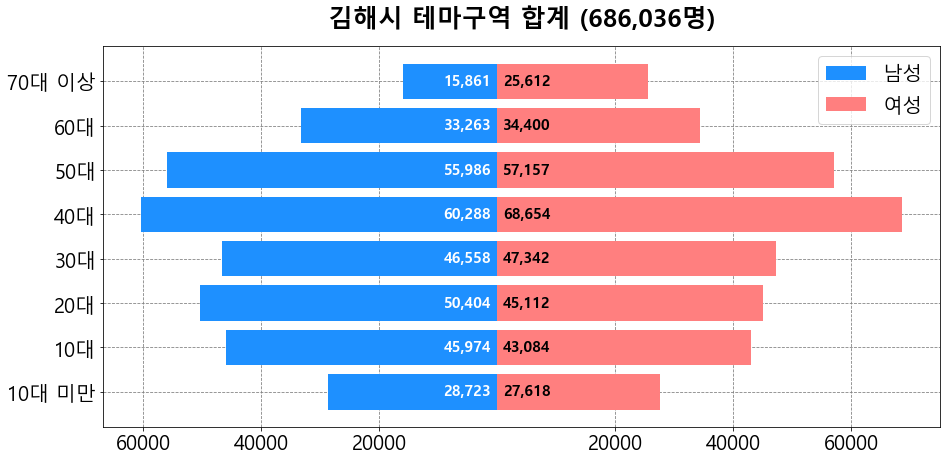

In [251]:
f, ax = plt.subplots(figsize=(15, 7))
plt.rc('font', size=20)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

ax.barh(range(8), cnct_df_drop.loc[18][1:9]*-1, label='남성', color=['dodgerblue'])
ax.barh(range(8), cnct_df_drop.loc[18][9:17], label='여성', color=['#ff7f7f'])


ax.set_yticks(np.arange(0, 8), ('10대 미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'))
ax.set_xticks([-60000, -40000, -20000, 20000, 40000, 60000], ['60000', '40000', '20000', '20000', '40000', '60000'])


# 그래프 위에 값 표시하기
for idx, value in enumerate(cnct_df_drop.loc[18][9:17]):
    plt.text(1000, idx, str(format(value, ',d')), fontsize=15, 
             horizontalalignment='left', verticalalignment='center', fontweight = 'bold')
for idx, value in enumerate(cnct_df_drop.loc[18][1:9]*-1):
    plt.text(-1000, idx, str(format(value*-1, ',d')), fontsize=15, 
             horizontalalignment='right', verticalalignment='center',fontweight = 'bold', color='w')

ax.set_title('김해시 테마구역 합계' + ' ('+str(format(cnct_df_drop.loc[18]['t_sum'], ',d')) + '명)', 
             size=25, pad=20, fontweight = 'bold')
ax.legend()
        
plt.show()